In [75]:
import os, sys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from tqdm import *
import pickle

In [8]:
sys.path

['c:\\Users\\guoyy\\OneDrive\\Desktop\\computer vision\\HW\\HW1',
 'c:\\Users\\guoyy\\AppData\\Local\\Programs\\Python\\Python39\\python39.zip',
 'c:\\Users\\guoyy\\AppData\\Local\\Programs\\Python\\Python39\\DLLs',
 'c:\\Users\\guoyy\\AppData\\Local\\Programs\\Python\\Python39\\lib',
 'c:\\Users\\guoyy\\AppData\\Local\\Programs\\Python\\Python39',
 '',
 'C:\\Users\\guoyy\\AppData\\Roaming\\Python\\Python39\\site-packages',
 'C:\\Users\\guoyy\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32',
 'C:\\Users\\guoyy\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32\\lib',
 'C:\\Users\\guoyy\\AppData\\Roaming\\Python\\Python39\\site-packages\\Pythonwin',
 'c:\\Users\\guoyy\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages']

In [9]:
rootPath = os.getcwd()
rawdataPath = os.path.join(rootPath,"rawdata")
dataPath = os.path.join(rootPath,"data")
modelPath = os.path.join(rootPath,"model")
if not os.path.exists(dataPath):
    os.makedirs(dataPath)
if not os.path.exists(modelPath):
    os.makedirs(modelPath)

In [10]:
train = pd.read_csv(os.path.join(rawdataPath,"train.csv"))
test = pd.read_csv(os.path.join(rawdataPath,"test.csv"))
X = train.iloc[:,1:].values
y = train.iloc[:, 0]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

 92%|█████████▏| 12/13 [48:04<04:00, 240.36s/it]

0.9616666666666667


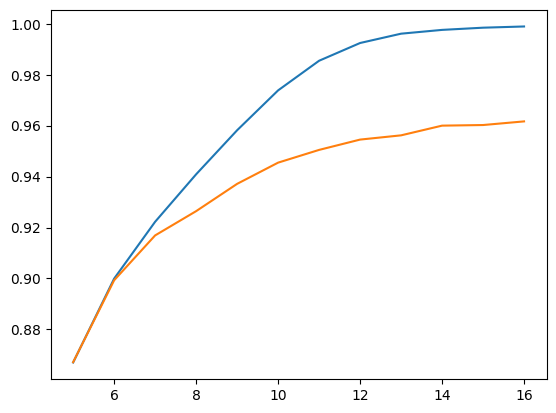

In [25]:
train_scores = []
test_score = []
with tqdm(total=13) as pbar:
    for i in tqdm(range(5,17)):
        forest_model = RandomForestClassifier(max_depth= i, n_estimators = 1000, n_jobs= -1)
        forest_model.fit(X_train,y_train)
        train_scores.append(forest_model.score(X_train,y_train))
        test_score.append(forest_model.score(X_val,y_val))
        pbar.update(1)
        pbar.set_description("Processing %i" % i)

plt.plot(list(range(5,17)),train_scores)
plt.plot(list(range(5,17)),test_score)

print(max(test_score))

In [26]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=15, n_jobs= -1)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9616666666666667

In [32]:
##submission for n_estimators=1000, max_depth=15
type(rf.predict(test))

c:\Users\guoyy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


numpy.ndarray

In [37]:
submission_df = pd.DataFrame({
    "ImageId": pd.Series(range(1, 28001), name="ImageId"),
    "Label": pd.Series(rf.predict(test), name="Label")
})
submission_df.to_csv(os.path.join(dataPath,"submission1.csv"), index=False)

c:\Users\guoyy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [54]:
train_scores = []
test_scores = []

with tqdm(total=10) as pbar:
    for i in [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
        forest_model = RandomForestClassifier(max_depth=15, n_estimators=i, n_jobs=-1)
        forest_model.fit(X_train, y_train)
        train_scores.append(forest_model.score(X_train, y_train))
        test_scores.append(forest_model.score(X_val, y_val))
        pbar.update(1)
        pbar.set_description(f"Processing {i} estimators")
print(max(test_scores))

Processing 1000 estimators: 100%|██████████| 10/10 [03:07<00:00, 18.79s/it]

0.9623809523809523


In [57]:
test_scores # from 300

[0.9604761904761905,
 0.9614285714285714,
 0.9623809523809523,
 0.9604761904761905,
 0.9592857142857143,
 0.960952380952381,
 0.9597619047619048,
 0.9614285714285714,
 0.96,
 0.9607142857142857]

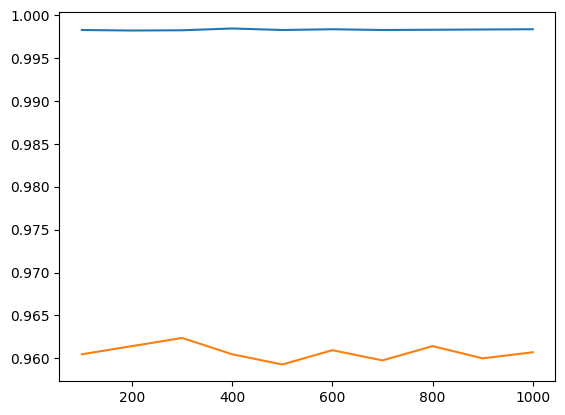

In [55]:
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],train_scores)
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],test_scores)

In [58]:
rf = RandomForestClassifier(n_estimators=300, max_depth=15, n_jobs= -1) #that probably be my last answer.
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.960952380952381

In [59]:
rf_df = pd.DataFrame({
    "ImageId" : pd.Series(range(1,28001)),
    "Label" : rf.predict(test)
})
rf_df.to_csv(os.path.join(dataPath,"submission300.csv"), sep=",", index=False)

c:\Users\guoyy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [60]:
train_scores = []
test_scores = []

with tqdm(total=10) as pbar:
    for i in [250,260,270,280,290,300,310,320,330,340]:
        forest_model = RandomForestClassifier(max_depth=15, n_estimators=i, n_jobs=-1)
        forest_model.fit(X_train, y_train)
        train_scores.append(forest_model.score(X_train, y_train))
        test_scores.append(forest_model.score(X_val, y_val))
        pbar.update(1)
        pbar.set_description(f"Processing {i} estimators")
print(max(test_scores))

Processing 340 estimators: 100%|██████████| 10/10 [01:42<00:00, 10.22s/it]

0.9635714285714285


In [61]:
print(max(test_scores),np.argmax(test_scores))  #260

0.9635714285714285 1


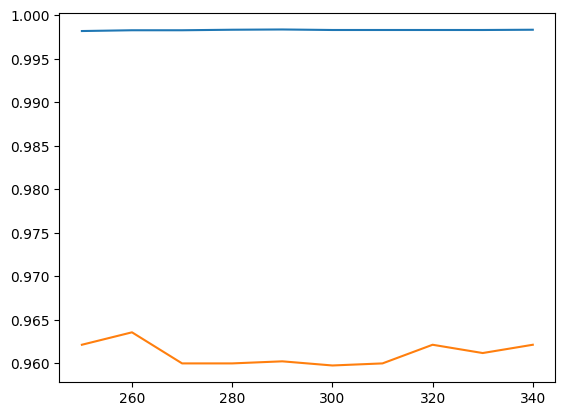

In [63]:
plt.plot([250,260,270,280,290,300,310,320,330,340],train_scores)
plt.plot([250,260,270,280,290,300,310,320,330,340],test_scores)

In [64]:
rf = RandomForestClassifier(n_estimators=260, max_depth=15, n_jobs= -1) #that probably be my last answer.
rf.fit(X_train,y_train)
rf.score(X_test,y_test)
rf_df = pd.DataFrame({
    "ImageId" : pd.Series(range(1,28001)),
    "Label" : rf.predict(test)
})
rf_df.to_csv(os.path.join(dataPath,"submission260.csv"), sep=",", index=False)

c:\Users\guoyy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
rf = RandomForestClassifier(n_estimators=450, max_depth=15, n_jobs= -1) #that probably be my last answer.
rf.fit(X_train,y_train)
rf.score(X_test,y_test)
rf_df = pd.DataFrame({
    "ImageId" : pd.Series(range(1,28001)),
    "Label" : rf.predict(test)
})
rf_df.to_csv(os.path.join(dataPath,"submission260.csv"), sep=",", index=False)

In [65]:
rf = RandomForestClassifier(n_estimators=450, max_depth=15, n_jobs= -1) #that probably be my last answer.
rf.fit(X_train,y_train)
rf.score(X_test,y_test)
rf_df = pd.DataFrame({
    "ImageId" : pd.Series(range(1,28001)),
    "Label" : rf.predict(test)
})
rf_df.to_csv(os.path.join(dataPath,"submission450.csv"), sep=",", index=False)

c:\Users\guoyy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [66]:
rf = RandomForestClassifier(n_estimators=450, n_jobs= -1) #that probably be my last answer.
rf.fit(X_train,y_train)
rf.score(X_test,y_test)
rf_df = pd.DataFrame({
    "ImageId" : pd.Series(range(1,28001)),
    "Label" : rf.predict(test)
})
rf_df.to_csv(os.path.join(dataPath,"submission450_1.csv"), sep=",", index=False)

c:\Users\guoyy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


****
#### trying to analyze which number is wrongly recognized
****

In [72]:
result = rf.predict(X_test)
conf = confusion_matrix(y_test, result)
conf
## It is weird, I cannot understand the meaning foreach row!!

array([[401,   0,   0,   0,   1,   0,   2,   0,   1,   0],
       [  0, 451,   2,   0,   0,   1,   1,   0,   0,   0],
       [  2,   3, 409,   0,   6,   0,   1,   1,   2,   0],
       [  1,   0,   2, 428,   0,   5,   0,   4,   4,   4],
       [  0,   0,   1,   0, 377,   0,   5,   0,   0,   5],
       [  0,   1,   2,   7,   0, 342,   6,   2,   2,   2],
       [  1,   1,   0,   0,   1,   1, 381,   0,   4,   0],
       [  1,   1,   9,   1,   3,   0,   0, 433,   0,   9],
       [  1,   1,   1,   3,   1,   0,   4,   0, 427,   4],
       [  1,   3,   1,   6,   2,   3,   0,   5,   2, 405]], dtype=int64)

In [114]:
print(classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       405
           1       0.98      0.99      0.98       455
           2       0.96      0.96      0.96       424
           3       0.96      0.96      0.96       448
           4       0.96      0.97      0.97       388
           5       0.97      0.94      0.96       364
           6       0.95      0.98      0.97       389
           7       0.97      0.95      0.96       457
           8       0.97      0.97      0.97       442
           9       0.94      0.95      0.95       428

    accuracy                           0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200



In [110]:
##I want to write a function to see each number!!
def misprediction(input):
    mask = (y_test == input) & (result != input)
    x_re = X_test[mask].reshape(-1,784) / 255.0
    result[mask]
    len = x_re.shape[0]
    fig, axes = plt.subplots(1, len, figsize=(20, 20))
    for i in range(len):
        axes[i].imshow(x_re[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"{result[mask][i]}")
## that is super interesting

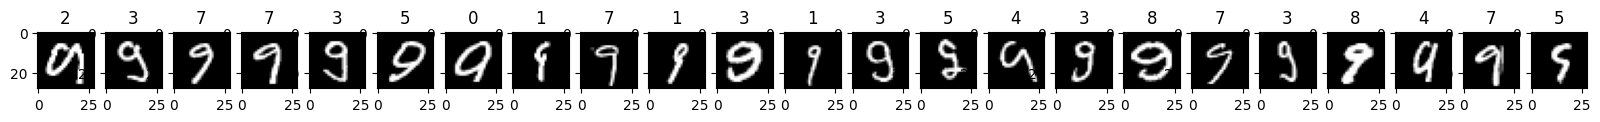

In [112]:
misprediction(9)

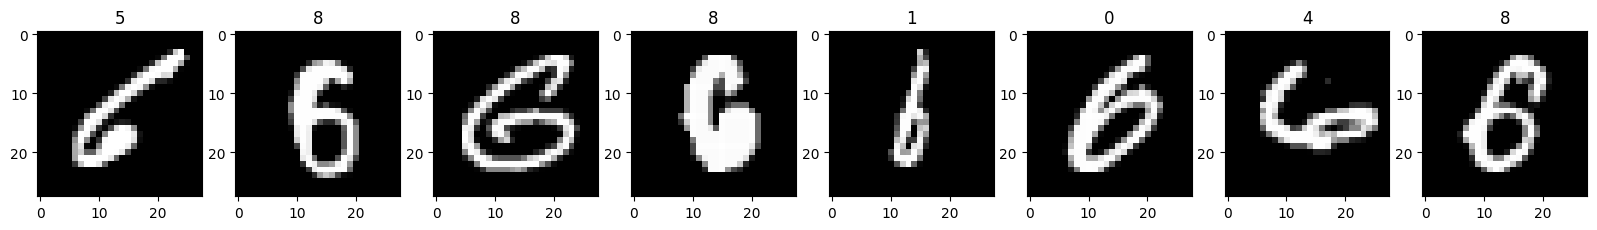

In [111]:
misprediction(6)
#I do not think human can recognize this 6

In [ ]:
# x_re = X.values.reshape((-1, 784)) / 255.0


# digit_images = {i: [] for i in range(10)}

# for image, label in zip(x_re, Y):
#     if len(digit_images[label]) < 3:
#         digit_images[label].append(image)


# fig, axes = plt.subplots(10, 3, figsize=(10, 20))

# for digit in range(10):
#     for col, image in enumerate(digit_images[digit]):
#         ax = axes[digit, col]
#         ax.imshow(image.reshape(28, 28), cmap='cividis')
#         ax.axis('off')
        
#         if col<3:
#             ax.set_title(f'Digit {digit}')
            
# plt.tight_layout()
# plt.show()

In [113]:
# mask = (y_test == 9) & (result != 9)

# # Apply the mask to X_test
# x_re = X_test[mask].reshape(-1,784) / 255.0

# for i in range(x_re.shape[0]):
#     plt.imshow(x_re[4].reshape(28,28), cmap='gray')
# result[mask][1]

In [73]:
# # this function draw images
# def plot_digits(instances, images_per_row=10, **options):
#     size = 28
#     images_per_row = min(len(instances), images_per_row)
#     images = [instance.reshape(size,size) for instance in instances]
#     n_rows = (len(instances) - 1) // images_per_row + 1
#     row_images = []
#     n_empty = n_rows * images_per_row - len(instances)
#     images.append(np.zeros((size, size * n_empty)))
#     for row in range(n_rows):
#         rimages = images[row * images_per_row : (row + 1) * images_per_row]
#         row_images.append(np.concatenate(rimages, axis=1))
#     image = np.concatenate(row_images, axis=0)
#     plt.imshow(image, cmap = matplotlib.cm.binary, **options)
#     plt.axis("off") fuck so hard

In [115]:
# rf.get_params()

In [ ]:
# total_iter = 32
# tqdm_bar = tqdm(total=total_iter, desc="Bayesian Optimization")

# def on_step(optim_result):
#     print("Completed iteration", len(optim_result.x_iters))
#     tqdm_bar.update(1)


# # Define parameter space
# param_space = {
#     'n_estimators': Integer(100, 500),
#     'max_depth': Integer(3, 15),
#     'min_samples_split': Real(0.01, 0.1)
# }

# # Initialize BayesSearchCV
# bayes_search = BayesSearchCV(
#     RandomForestClassifier(),
#     param_space,
#     n_iter=1,  # Set n_iter to 1 for the workaround
#     random_state=42,
#     cv=5,
#     n_jobs=-1
# )
# np.int = int
# for i in range(total_iter):
#     bayes_search.fit(X_train, y_train)
#     on_step(bayes_search.optimizer_results_[0])  # Call the logging function

In [116]:
# # RandomForestClassifier with 400 estimators
# rf = RandomForestClassifier(n_estimators=400)

# # K-Fold for cross-validation
# kf = KFold(n_splits=5)

# # List to store scores
# scores = []

# # Manually iterate over folds and fit the model
# for train_index, test_index in tqdm(kf.split(X), total=kf.get_n_splits(), desc="Cross-Validation"):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

#     rf.fit(X_train, y_train)
#     scores.append(rf.score(X_test, y_test))

# # Convert scores to a numpy array and print results
# cv_scores = np.array(scores)
# print("CV Scores:", cv_scores)
# print("Average CV Score:", cv_scores.mean())

In [97]:
# with open(os.path.join(modelPath,"rf.pkl"),"wb") as file:
#     pickle.dump(rf, file)

In [99]:
# with open(os.path.join(modelPath,"rf.pkl"),"rb") as file:
#     rf_model = pickle.load(file)
# ##using joblib the next time